In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
df = pd.read_csv('/content/drive/MyDrive/br_rj_isp_estatisticas_seguranca_armas_apreendidas_mensal.csv')

In [5]:
df.head()

,ano,mes,id_cisp,id_aisp,id_risp,quantidade_arma_fabricacao_caseira,quantidade_carabina,quantidade_espingarda,quantidade_fuzil,quantidade_garrucha,quantidade_garruchao,quantidade_metralhadora,quantidade_outros,quantidade_pistola,quantidade_revolver,quantidade_submetralhadora,total
0,2007,10,10,2,1,0,0,3,7,1,0,3,0,12,6,0,32
1,2021,2,105,26,7,0,0,3,0,7,8,0,0,9,11,0,38
2,2013,10,105,26,7,0,1,4,0,2,0,0,2,5,7,0,21
3,2021,5,105,26,7,0,0,0,0,9,0,0,0,4,9,0,22
4,2021,12,106,26,7,0,4,4,0,0,0,0,0,7,6,0,21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31380 entries, 0 to 31379
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   ano                                 31380 non-null  int64
 1   mes                                 31380 non-null  int64
 2   id_cisp                             31380 non-null  int64
 3   id_aisp                             31380 non-null  int64
 4   id_risp                             31380 non-null  int64
 5   quantidade_arma_fabricacao_caseira  31380 non-null  int64
 6   quantidade_carabina                 31380 non-null  int64
 7   quantidade_espingarda               31380 non-null  int64
 8   quantidade_fuzil                    31380 non-null  int64
 9   quantidade_garrucha                 31380 non-null  int64
 10  quantidade_garruchao                31380 non-null  int64
 11  quantidade_metralhadora             31380 non-null  int64
 12  quan

In [7]:
df.isnull().sum()

,0
ano,0
mes,0
id_cisp,0
id_aisp,0
id_risp,0
quantidade_arma_fabricacao_caseira,0
quantidade_carabina,0
quantidade_espingarda,0
quantidade_fuzil,0
quantidade_garrucha,0


In [8]:
df['data'] = df['ano'].astype(str) + '-' + df['mes'].astype(str).str.zfill(2) + '-01'

In [9]:
df.head()

,ano,mes,id_cisp,id_aisp,id_risp,quantidade_arma_fabricacao_caseira,quantidade_carabina,quantidade_espingarda,quantidade_fuzil,quantidade_garrucha,quantidade_garruchao,quantidade_metralhadora,quantidade_outros,quantidade_pistola,quantidade_revolver,quantidade_submetralhadora,total,data
0,2007,10,10,2,1,0,0,3,7,1,0,3,0,12,6,0,32,2007-10-01
1,2021,2,105,26,7,0,0,3,0,7,8,0,0,9,11,0,38,2021-02-01
2,2013,10,105,26,7,0,1,4,0,2,0,0,2,5,7,0,21,2013-10-01
3,2021,5,105,26,7,0,0,0,0,9,0,0,0,4,9,0,22,2021-05-01
4,2021,12,106,26,7,0,4,4,0,0,0,0,0,7,6,0,21,2021-12-01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31380 entries, 0 to 31379
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ano                                 31380 non-null  int64 
 1   mes                                 31380 non-null  int64 
 2   id_cisp                             31380 non-null  int64 
 3   id_aisp                             31380 non-null  int64 
 4   id_risp                             31380 non-null  int64 
 5   quantidade_arma_fabricacao_caseira  31380 non-null  int64 
 6   quantidade_carabina                 31380 non-null  int64 
 7   quantidade_espingarda               31380 non-null  int64 
 8   quantidade_fuzil                    31380 non-null  int64 
 9   quantidade_garrucha                 31380 non-null  int64 
 10  quantidade_garruchao                31380 non-null  int64 
 11  quantidade_metralhadora             31380 non-null  in

In [11]:
df['data'] = pd.to_datetime(df['data'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31380 entries, 0 to 31379
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ano                                 31380 non-null  int64         
 1   mes                                 31380 non-null  int64         
 2   id_cisp                             31380 non-null  int64         
 3   id_aisp                             31380 non-null  int64         
 4   id_risp                             31380 non-null  int64         
 5   quantidade_arma_fabricacao_caseira  31380 non-null  int64         
 6   quantidade_carabina                 31380 non-null  int64         
 7   quantidade_espingarda               31380 non-null  int64         
 8   quantidade_fuzil                    31380 non-null  int64         
 9   quantidade_garrucha                 31380 non-null  int64         
 10  quantidade_garruchao  

In [13]:
df['total'].describe()

,total
count,31380.000000
mean,4.637094
std,5.941119
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,201.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31380 entries, 0 to 31379
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ano                                 31380 non-null  int64         
 1   mes                                 31380 non-null  int64         
 2   id_cisp                             31380 non-null  int64         
 3   id_aisp                             31380 non-null  int64         
 4   id_risp                             31380 non-null  int64         
 5   quantidade_arma_fabricacao_caseira  31380 non-null  int64         
 6   quantidade_carabina                 31380 non-null  int64         
 7   quantidade_espingarda               31380 non-null  int64         
 8   quantidade_fuzil                    31380 non-null  int64         
 9   quantidade_garrucha                 31380 non-null  int64         
 10  quantidade_garruchao  

In [15]:
df.shape

(31380, 18)

In [16]:
df['total'].mean()

np.float64(4.637093690248566)

In [17]:
df['total'].median()

3.0

In [18]:
df['total'].mode()

,total
0,0


In [19]:
df_total_armas_por_ano = df.groupby('ano')['total'].sum().reset_index()

<ipython-input-20-3e03dd672a21>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ano', y='total', data=df_total_armas_por_ano, palette='viridis')


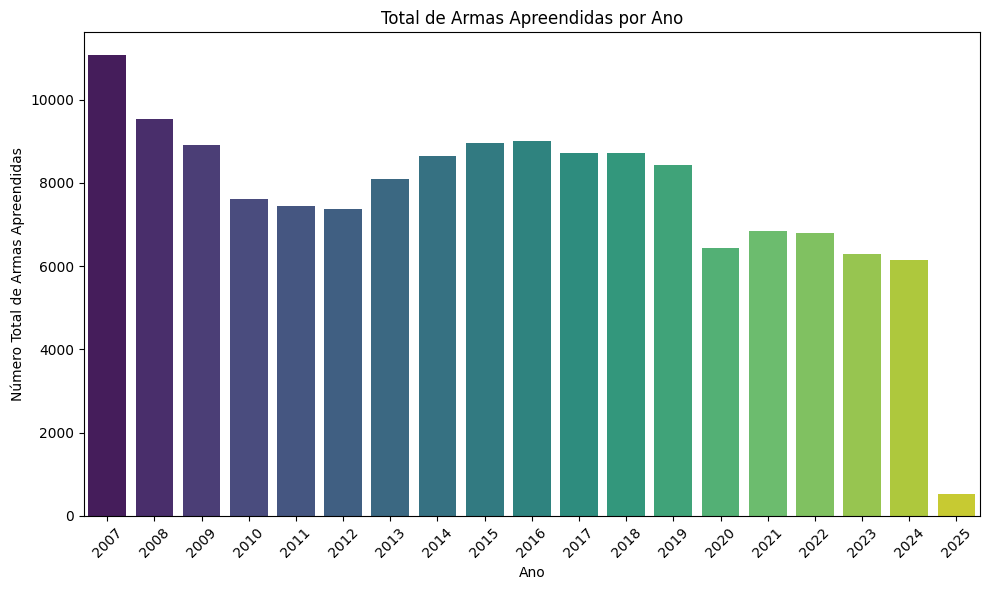

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ano', y='total', data=df_total_armas_por_ano, palette='viridis')
plt.title('Total de Armas Apreendidas por Ano')
plt.xlabel('Ano')
plt.ylabel('Número Total de Armas Apreendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
colunas_armas_quantidade = [
     'quantidade_arma_fabricacao_caseira', 'quantidade_garrucha', 'quantidade_espingarda',
     'quantidade_carabina', 'quantidade_fuzil', 'quantidade_metralhadora',
     'quantidade_pistola', 'quantidade_revolver', 'quantidade_submetralhadora',
     'quantidade_outros'
 ]

In [22]:
colunas_armas_quantidade

['quantidade_arma_fabricacao_caseira',
 'quantidade_garrucha',
 'quantidade_espingarda',
 'quantidade_carabina',
 'quantidade_fuzil',
 'quantidade_metralhadora',
 'quantidade_pistola',
 'quantidade_revolver',
 'quantidade_submetralhadora',
 'quantidade_outros']

In [23]:
colunas_para_agregar = ['ano'] + colunas_armas_quantidade

In [24]:
colunas_para_agregar

['ano',
 'quantidade_arma_fabricacao_caseira',
 'quantidade_garrucha',
 'quantidade_espingarda',
 'quantidade_carabina',
 'quantidade_fuzil',
 'quantidade_metralhadora',
 'quantidade_pistola',
 'quantidade_revolver',
 'quantidade_submetralhadora',
 'quantidade_outros']

In [25]:
df_agregacao = df[colunas_para_agregar]

In [26]:
df_agregacao

,ano,quantidade_arma_fabricacao_caseira,quantidade_garrucha,quantidade_espingarda,quantidade_carabina,quantidade_fuzil,quantidade_metralhadora,quantidade_pistola,quantidade_revolver,quantidade_submetralhadora,quantidade_outros
0,2007,0,1,3,0,7,3,12,6,0,0
1,2021,0,7,3,0,0,0,9,11,0,0
2,2013,0,2,4,1,0,0,5,7,0,2
3,2021,0,9,0,0,0,0,4,9,0,0
4,2021,0,0,4,4,0,0,7,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...
31375,2011,0,0,0,1,0,0,3,15,0,0
31376,2021,1,0,0,0,0,0,9,9,0,0
31377,2015,0,0,1,0,0,0,6,12,0,0
31378,2017,0,0,3,0,0,0,6,10,0,0


In [27]:
armas_por_ano = df_agregacao.groupby('ano').sum().reset_index()

In [28]:
armas_por_ano

,ano,quantidade_arma_fabricacao_caseira,quantidade_garrucha,quantidade_espingarda,quantidade_carabina,quantidade_fuzil,quantidade_metralhadora,quantidade_pistola,quantidade_revolver,quantidade_submetralhadora,quantidade_outros
0,2007,541,365,1360,157,214,59,2275,5792,14,268
1,2008,269,290,1084,122,183,60,2197,5082,27,212
2,2009,170,210,1083,118,210,71,2373,4461,44,168
3,2010,114,164,923,108,257,95,2311,3489,35,94
4,2011,88,181,775,79,260,93,2268,3521,51,102
5,2012,97,147,721,79,246,70,2438,3446,49,66
6,2013,103,154,678,92,256,58,2840,3801,41,70
7,2014,91,158,777,85,279,47,3075,3988,57,76
8,2015,128,129,817,101,344,36,3562,3692,44,87
9,2016,106,111,711,103,369,23,3834,3613,58,78


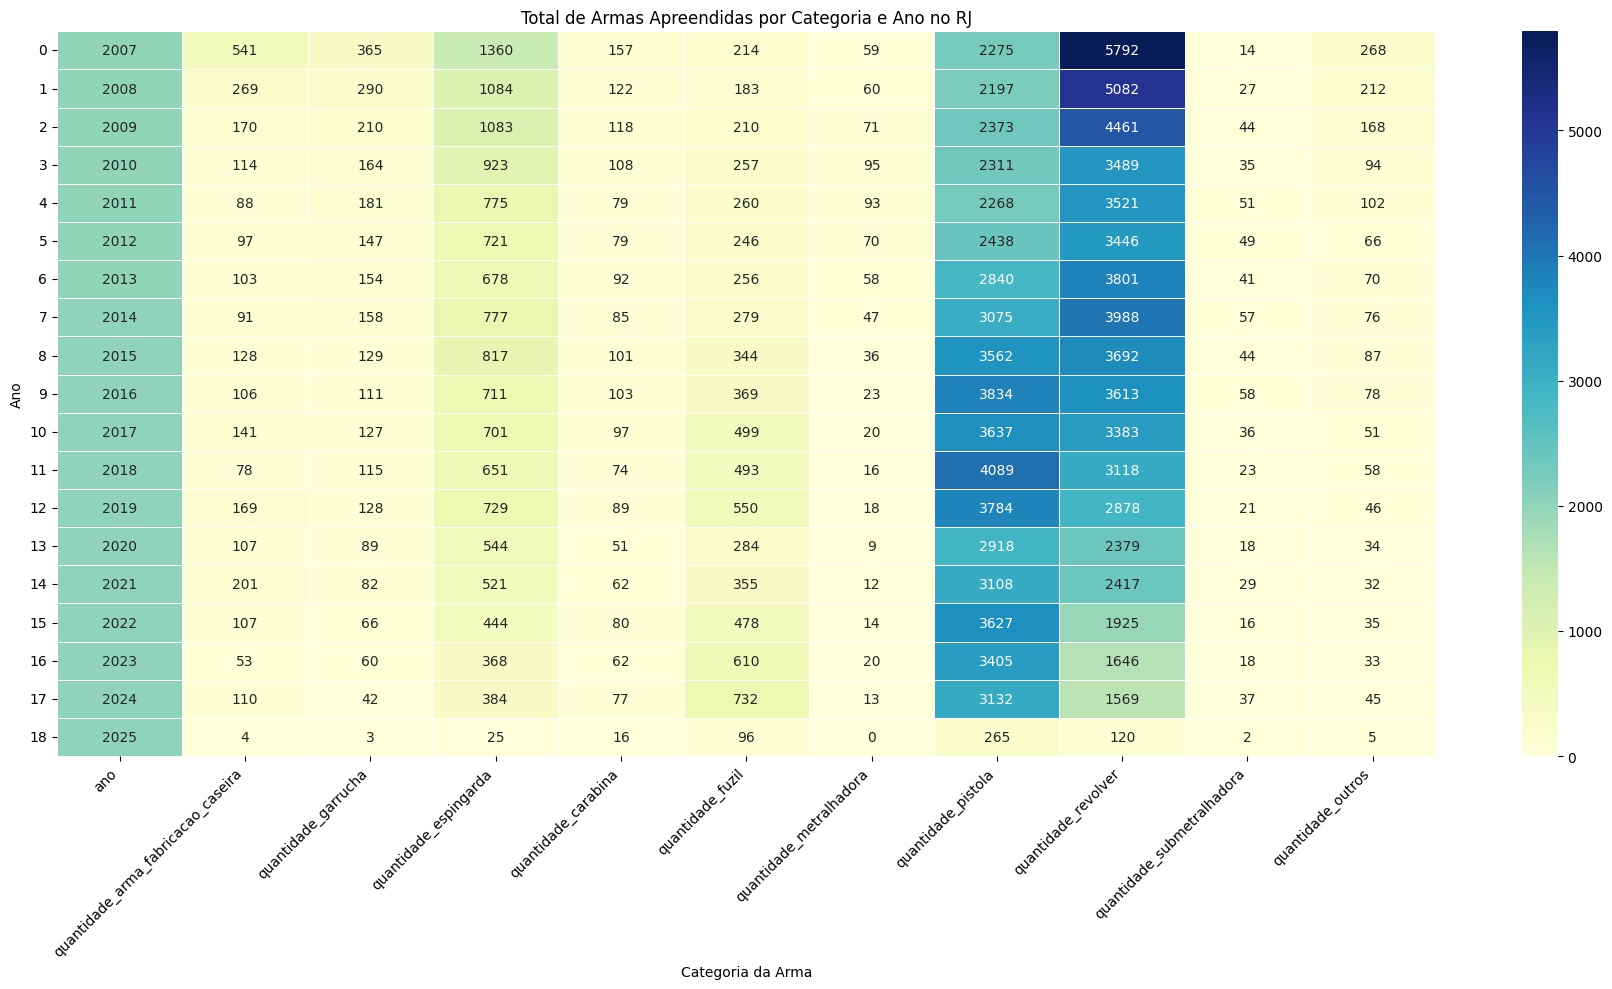

In [29]:
plt.figure(figsize=(18, 10))
sns.heatmap(armas_por_ano, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Total de Armas Apreendidas por Categoria e Ano no RJ')
plt.xlabel('Categoria da Arma')
plt.ylabel('Ano')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
df.head()

,ano,mes,id_cisp,id_aisp,id_risp,quantidade_arma_fabricacao_caseira,quantidade_carabina,quantidade_espingarda,quantidade_fuzil,quantidade_garrucha,quantidade_garruchao,quantidade_metralhadora,quantidade_outros,quantidade_pistola,quantidade_revolver,quantidade_submetralhadora,total,data
0,2007,10,10,2,1,0,0,3,7,1,0,3,0,12,6,0,32,2007-10-01
1,2021,2,105,26,7,0,0,3,0,7,8,0,0,9,11,0,38,2021-02-01
2,2013,10,105,26,7,0,1,4,0,2,0,0,2,5,7,0,21,2013-10-01
3,2021,5,105,26,7,0,0,0,0,9,0,0,0,4,9,0,22,2021-05-01
4,2021,12,106,26,7,0,4,4,0,0,0,0,0,7,6,0,21,2021-12-01


In [31]:
df['total'].head()

,total
0,32
1,38
2,21
3,22
4,21


In [32]:
df.columns

Index(['ano', 'mes', 'id_cisp', 'id_aisp', 'id_risp',
       'quantidade_arma_fabricacao_caseira', 'quantidade_carabina',
       'quantidade_espingarda', 'quantidade_fuzil', 'quantidade_garrucha',
       'quantidade_garruchao', 'quantidade_metralhadora', 'quantidade_outros',
       'quantidade_pistola', 'quantidade_revolver',
       'quantidade_submetralhadora', 'total', 'data'],
      dtype='object')

In [33]:
df_total_armas_por_mes_ano = df.groupby('data')['total'].sum().reset_index()

In [34]:
df_total_armas_por_mes_ano

,data,total
0,2007-01-01,858
1,2007-02-01,944
2,2007-03-01,1054
3,2007-04-01,950
4,2007-05-01,1062
...,...,...
223,2025-08-01,0
224,2025-09-01,0
225,2025-10-01,0
226,2025-11-01,0


In [35]:
df_total_armas_por_mes_ano = df_total_armas_por_mes_ano.sort_values(by='data')

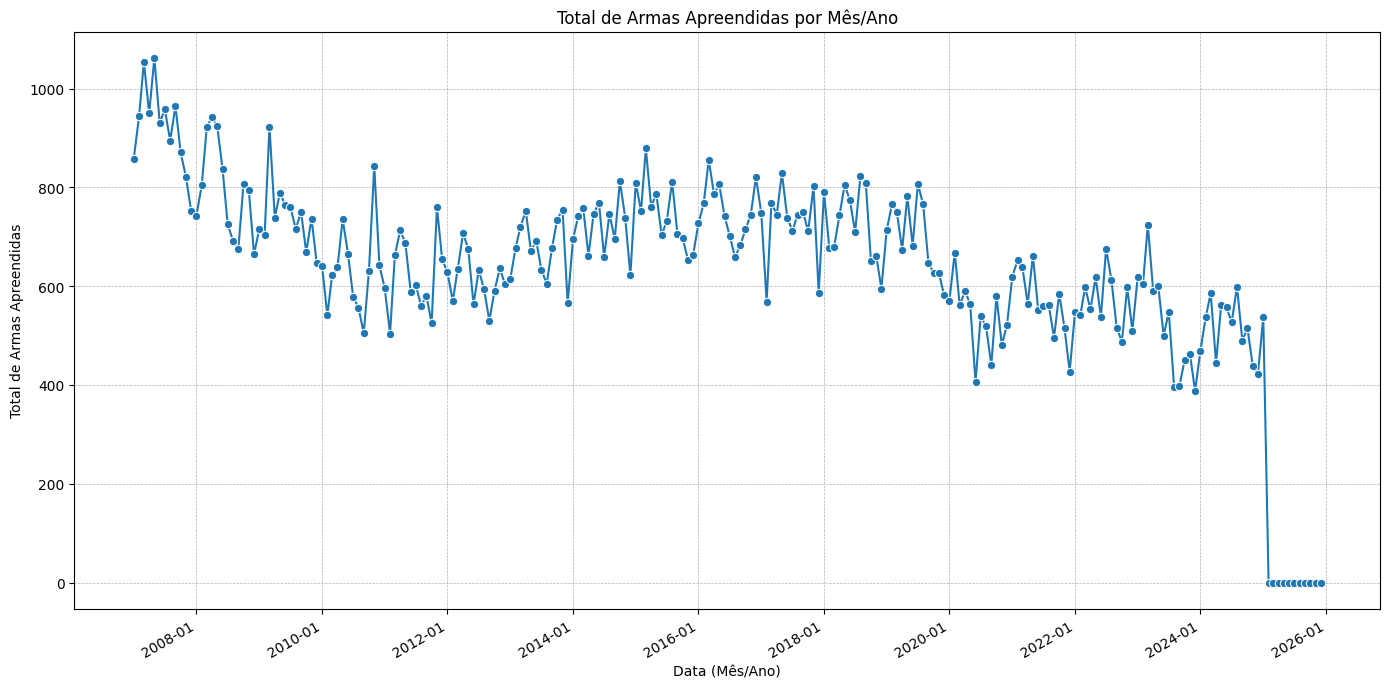

In [36]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='data', y='total', data=df_total_armas_por_mes_ano, marker='o', linestyle='-')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=8, maxticks=15))
plt.gcf().autofmt_xdate()
plt.title('Total de Armas Apreendidas por Mês/Ano')
plt.xlabel('Data (Mês/Ano)')
plt.ylabel('Total de Armas Apreendidas')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

a) No conjunto de dados que escolhi, não encontrei nenhuma coluna que fosse possível converter, além das que já foram convertidas como as colunas de 'mes' e 'ano', que transformei em data, para comparação.

In [46]:
if 'mes' in df.columns:
    def categorizar_trimestre(numero_mes):
        if numero_mes in [1, 2, 3]:
            return 'Primeiro Trimestre'
        elif numero_mes in [4, 5, 6]:
            return 'Segundo Trimestre'
        elif numero_mes in [7, 8, 9]:
            return 'Terceito Trimestre'
        elif numero_mes in [10, 11, 12]:
            return 'Quarto Trimestre'
        return None

In [47]:
df['trimestre'] = df['mes'].apply(categorizar_trimestre)

In [48]:
df[['ano', 'mes', 'trimestre']]

,ano,mes,trimestre
0,2007,10,Quarto Trimestre
1,2021,2,Primeiro Trimestre
2,2013,10,Quarto Trimestre
3,2021,5,Segundo Trimestre
4,2021,12,Quarto Trimestre
...,...,...,...
31375,2011,12,Quarto Trimestre
31376,2021,3,Primeiro Trimestre
31377,2015,9,Terceito Trimestre
31378,2017,7,Terceito Trimestre


In [49]:
df['total_armas_calculado_no_mes'] = df[colunas_armas_quantidade].sum(axis=1)

In [51]:
df['proporcao_pistola'] = df.apply(lambda row: row['quantidade_pistola'] / row['total_armas_calculado_no_mes'] if row['total_armas_calculado_no_mes'] > 0 else 0, axis=1)

In [54]:
df[['ano', 'mes', 'quantidade_pistola', 'total_armas_calculado_no_mes', 'proporcao_pistola']].head()

,ano,mes,quantidade_pistola,total_armas_calculado_no_mes,proporcao_pistola
0,2007,10,12,32,0.375000
1,2021,2,9,30,0.300000
2,2013,10,5,21,0.238095
3,2021,5,4,22,0.181818
4,2021,12,7,21,0.333333


In [56]:
scaler = StandardScaler()

In [58]:
total_armas_reshaped = df['total_armas_calculado_no_mes'].values.reshape(-1, 1)

In [59]:
df['total_armas_padronizado'] = scaler.fit_transform(total_armas_reshaped)

In [61]:
df[['total_armas_calculado_no_mes', 'total_armas_padronizado']].head()

,total_armas_calculado_no_mes,total_armas_padronizado
0,32,4.610251
1,30,4.273350
2,21,2.757298
3,22,2.925748
4,21,2.757298


In [63]:
min_max_scaler = MinMaxScaler()

In [65]:
total_armas_reshaped = df['total_armas_calculado_no_mes'].values.reshape(-1, 1)

In [68]:
df['total_armas_minmax'] = min_max_scaler.fit_transform(total_armas_reshaped)

In [69]:
df[['total_armas_calculado_no_mes', 'total_armas_minmax']].head()

,total_armas_calculado_no_mes,total_armas_minmax
0,32,0.159204
1,30,0.149254
2,21,0.104478
3,22,0.109453
4,21,0.104478


In [70]:
df['total_armas_calculado_no_mes'].min()

0

In [73]:
df['total_armas_calculado_no_mes'].max()

201